In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from pathlib import Path
import os
import pandas as pd
import scanpy as sc
import cellink as cl

/opt/modules/i12g/anaconda/envs/mzb_scgenetics/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from cellink.tl._burden_testing import *

In [5]:
cell_type_col = "cell_label"

In [6]:
base_data_dir = Path("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/")
input_dir = base_data_dir / "input_data"
## defining the path to the data
scdata_path = input_dir / "chr22_OneK1K_cohort_gene_expression_matrix_14_celltypes.h5ad.gz"

# gdata_path = input_dir / "plink/"
dump_path = base_data_dir / "output/example_output"
## defining target chromosome
target_chromosome = "22"

In [9]:
# plink_file = os.path.join(gdata_path, f"chr{target_chromosome}.dose.filtered.R2_0.8")
# gdata = cl.io.read_plink(plink_file)

In [7]:
gdata = ad.read_h5ad(input_dir / "gdata_chr22_with_annos.h5ad")
gdata.obs = gdata.obs.set_index("id", drop = False)

In [8]:
gdata

AnnData object with n_obs × n_vars = 1034 × 143083
    obs: 'id'
    var: 'chrom', 'pos', 'a0', 'a1', 'AF', 'ER2', 'maf', 'R2', 'contig', 'id', 'id_mask', 'quality'
    varm: 'annotations_0', 'annotations_1', 'annotations_2', 'annotations_3', 'annotations_4', 'annotations_5', 'annotations_6', 'annotations_7'

In [9]:
gdata.varm['annotations_0']

Location  gnomADe_OTH_AF  Consequence_intergenic_variant  \
snp_id                                                                         
22_16849573_A_G  22:16849573             NaN                               1   
22_16849971_A_T  22:16849971             NaN                               1   
22_16850437_G_A  22:16850437             NaN                               1   
22_16851225_C_T  22:16851225             NaN                               1   
22_16851356_C_T  22:16851356             NaN                               1   
...                      ...             ...                             ...   
22_51202748_A_G  22:51202748             NaN                               0   
22_51208568_G_T  22:51208568             NaN                               0   
22_51211031_A_G  22:51211031             NaN                               0   
22_51213613_C_T  22:51213613             NaN                               0   
22_51216564_T_C  22:51216564             NaN                               0   

                 Consequence_start_lost  gnomADe_SAS_AF SOMATIC  CADD_PHRED  \
snp_id                                                                        
22_16849573_A_G                       0             NaN       -       8.747   
22_16849971_A_T                       0             NaN       -       8.843   
22_16850437_G_A                       0             NaN       -       8.063   
22_16851225_C_T                       0             NaN       -       8.324   
22_16851356_C_T                       0             NaN       -       8.148   
...                                 ...             ...     ...         ...   
22_51202748_A_G                       0             NaN       -       9.870   
22_51208568_G_T                       0             NaN       -       4.299   
22_51211031_A_G                       0             NaN       -       5.127   
22_51213613_C_T                       0             NaN       -       0.190   
22_51216564_T_C                       0             NaN       -       1.282   

                CLIN_SIG  gnomADe_EAS_AF Feature_type  ...  \
snp_id                                                 ...   
22_16849573_A_G        -             NaN            -  ...   
22_16849971_A_T        -             NaN            -  ...   
22_16850437_G_A        -             NaN            -  ...   
22_16851225_C_T        -             NaN            -  ...   
22_16851356_C_T        -             NaN            -  ...   
...                  ...             ...          ...  ...   
22_51202748_A_G        -             NaN   Transcript  ...   
22_51208568_G_T        -             NaN   Transcript  ...   
22_51211031_A_G        -             NaN   Transcript  ...   
22_51213613_C_T        -             NaN   Transcript  ...   
22_51216564_T_C        -             NaN   Transcript  ...   

                 Consequence_splice_acceptor_variant  \
snp_id                                                 
22_16849573_A_G                                    0   
22_16849971_A_T                                    0   
22_16850437_G_A                                    0   
22_16851225_C_T                                    0   
22_16851356_C_T                                    0   
...                                              ...   
22_51202748_A_G                                    0   
22_51208568_G_T                                    0   
22_51211031_A_G                                    0   
22_51213613_C_T                                    0   
22_51216564_T_C                                    0   

                Consequence_splice_donor_5th_base_variant  \
snp_id                                                      
22_16849573_A_G                                         0   
22_16849971_A_T                                         0   
22_16850437_G_A                                         0   
22_16851225_C_T                                         0   
22_16851356_C_T                                  

### scdata is the adata in later created data obj

In [10]:
scdata = sc.read_h5ad(scdata_path)
scdata.var["chrom"] = "22" #current fix before chromosome is added to object 
scdata

AnnData object with n_obs × n_vars = 1272489 × 673
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'pool', 'individual', 'percent.mt', 'latent', 'nCount_SCT', 'nFeature_SCT', 'cell_type', 'cell_label', 'sex', 'age'
    var: 'GeneSymbol', 'features', 'chrom'

In [11]:
scdata.obs[cell_type_col].unique()

['CD4 ET', 'NK', 'CD4 NC', 'CD8 S100B', 'CD8 ET', ..., 'Mono C', 'Platelets', 'DC', 'Plasma', 'CD4 SOX4']
Length: 16
Categories (16, object): ['B IN', 'B Mem', 'CD4 ET', 'CD4 NC', ..., 'NK', 'NK R', 'Plasma', 'Platelets']

In [13]:
data = cl.DonorData(adata=scdata, gdata=gdata, donor_key_in_sc_adata="individual")

[2024-12-12 12:48:41,304] INFO:cellink._core.donordata: Keeping 981/1034 donors
[2024-12-12 12:48:41,305] INFO:cellink._core.donordata: Dropping 53/1034 donors from genetic data
[2024-12-12 12:48:41,305] INFO:cellink._core.donordata: Dropping 0/981 donors from single-cell data


In [14]:
data

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Cells (adata)                                          ┃ Donors (gdata)                                         ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ View of AnnData object with n_obs × n_vars = 1272489 × │ View of AnnData object with n_obs × n_vars = 981 ×     │
│ 673                                                    │ 143083                                                 │
│     obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA',   │     obs: 'id'                                          │
│ 'pool', 'individual', 'percent.mt', 'latent',          │                                                        │
│ 'nCount_SCT', 'nFeature_SCT', 'cell_type',             │                                                        │
│ 'cell_label', 'sex', 'age'                             │                                                        │
│     var: 'GeneSymbol', 'features', 'chrom'             │     var: 'chrom', 'pos', 'a0', 'a1', 'AF', 'ER2',      │
│                                                        │ 'maf', 'R2', 'contig', 'id', 'id_mask', 'quality'      │
│                                                        │     varm: 'annotations_0', 'annotations_1',            │
│                                                        │ 'annotations_2', 'annotations_3', 'annotations_4',     │
│                                                        │ 'annotations_5', 'annotations_6', 'annotations_7'      │
└────────────────────────────────────────────────────────┴────────────────────────────────────────────────────────┘

### CELLS

In [15]:
print("CELLS -> ids in obs X GENES -> info in var")
data.adata

CELLS -> ids in obs X GENES -> info in var


View of AnnData object with n_obs × n_vars = 1272489 × 673
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'pool', 'individual', 'percent.mt', 'latent', 'nCount_SCT', 'nFeature_SCT', 'cell_type', 'cell_label', 'sex', 'age'
    var: 'GeneSymbol', 'features', 'chrom'

In [16]:
# Gene expression matrix 
data.adata.X.nnz
print(min(np.unique(data.adata.X.data)),max(np.unique(data.adata.X.data)))

1.0 12556.0


In [121]:
# Gene expression matrix 
data.adata.X.nnz
print(min(np.unique(data.adata.X.data)),max(np.unique(data.adata.X.data)))

1.0 12556.0


In [18]:
data.adata.obs

orig.ident  nCount_RNA  nFeature_RNA  pool individual  \
barcode                                                                      
AAAGTAGCATCTCCCA-64           0      2353.0           966    62        1_1   
AGCTCCTAGCAGATCG-64           0      4037.0           945    62        1_1   
AGCTCCTAGGGAACGG-64           0      3666.0           965    62        1_1   
GCCAAATCAACTGCTA-64           0      1176.0           492    62        1_1   
AGCTCCTCATTACGAC-64           0      3154.0           784    62        1_1   
...                         ...         ...           ...   ...        ...   
ATTTCTGTCTGCCAGG-57           0      1087.0           501    55  1081_1082   
CGTGTCTTCACATAGC-57           0      3268.0          1141    55  1081_1082   
GCTCCTAAGTAGATGT-57           0      2875.0           897    55  1081_1082   
GCTCCTACAAGGTTTC-57           0      2543.0          1118    55  1081_1082   
TATGCCCTCTCCTATA-57           0      3099.0          1348    55  1081_1082   

                     percent.mt  latent  nCount_SCT  nFeature_SCT  cell_type  \
barcode                                                                        
AAAGTAGCATCTCCCA-64    1.359966       1      2661.0           966          3   
AGCTCCTAGCAGATCG-64    1.634877       1      3117.0           943          4   
AGCTCCTAGGGAACGG-64    1.036552       1      3080.0           964          0   
GCCAAATCAACTGCTA-64    5.272109       1      2652.0           525          3   
AGCTCCTCATTACGAC-64    1.838935       1      2952.0           783          0   
...                         ...     ...         ...           ...        ...   
ATTTCTGTCTGCCAGG-57    4.231831       1      2595.0           535          3   
CGTGTCTTCACATAGC-57    6.303550       1      3034.0          1141         11   
GCTCCTAAGTAGATGT-57    3.339130       1      2875.0           897          5   
GCTCCTACAAGGTTTC-57    3.578451       1      2718.0          1118         14   
TATGCCCTCTCCTATA-57    5.227493       1      2987.0          1348         14   

                    cell_label  sex  age  
barcode                                   
AAAGTAGCATCTCCCA-64     CD8 ET    2   65  
AGCTCCTAGCAGATCG-64     CD8 NC    2   65  
AGCTCCTAGGGAACGG-64     CD4 NC    2   65  
GCCAAATCAACTGCTA-64     CD8 ET    2   65  
AGCTCCTCATTACGAC-64     CD4 NC    2   65  
...                        ...  ...  ...  
ATTTCTGTCTGCCAGG-57     CD8 ET    1   73  
CGTGTCTTCACATAGC-57  Platelets    1   73  
GCTCCTAAGTAGATGT-57  CD8 S100B    1   73  
GCTCCTACAAGGTTTC-57         NK    1   73  
TATGCCCTCTCCTATA-57         NK    1   73  

[1272489 rows x 13 columns]

### DONORS

In [17]:
data.adata.var

GeneSymbol     features chrom
Geneid                                         
ENSG00000198445       CCT8L2       CCT8L2    22
ENSG00000100181       TPTEP1       TPTEP1    22
ENSG00000267338     KB-7G2.9     KB-7G2.9    22
ENSG00000235343   AC005301.8   AC005301.8    22
ENSG00000172967         XKR3         XKR3    22
...                      ...          ...   ...
ENSG00000100299         ARSA         ARSA    22
ENSG00000251322       SHANK3       SHANK3    22
ENSG00000100312          ACR          ACR    22
ENSG00000254499   AC002056.5   AC002056.5    22
ENSG00000079974       RABL2B       RABL2B    22

[673 rows x 3 columns]

In [23]:
data.gdata


View of AnnData object with n_obs × n_vars = 981 × 143083
    obs: 'id'
    var: 'chrom', 'pos', 'a0', 'a1', 'AF', 'ER2', 'maf', 'R2', 'contig', 'id', 'id_mask', 'quality'
    varm: 'annotations_0', 'annotations_1', 'annotations_2', 'annotations_3', 'annotations_4', 'annotations_5', 'annotations_6', 'annotations_7'

In [20]:
# how often do variants occur in donor?
print(f"{data.gdata.X.shape[0]} donors x {data.gdata.X.shape[1]} variants ")
data.gdata.X

981 donors x 143083 variants 


ArrayView([[2, 2, 2, ..., 0, 0, 0],
           [1, 1, 1, ..., 0, 0, 0],
           [1, 1, 1, ..., 0, 0, 0],
           ...,
           [1, 1, 1, ..., 1, 1, 1],
           [1, 1, 1, ..., 0, 0, 0],
           [2, 2, 2, ..., 0, 0, 0]])

In [22]:
print("donor ids")
data.gdata.obs

donor ids


id
id                  
1_1              1_1
2_2              2_2
3_3              3_3
4_4              4_4
6_6              6_6
...              ...
1077_1078  1077_1078
1078_1079  1078_1079
1079_1080  1079_1080
1080_1081  1080_1081
1081_1082  1081_1082

[981 rows x 1 columns]

In [25]:
print("variant annotation")
data.gdata.var

variant annotation


chrom       pos a0 a1       AF  ER2      maf       R2  contig  \
snp_id                                                                          
22_16849573_A_G    22  16849573  A  G  0.39991  NaN  0.39991  0.85929       0   
22_16849971_A_T    22  16849971  A  T  0.39455  NaN  0.39455  0.88142       0   
22_16850437_G_A    22  16850437  G  A  0.38920  NaN  0.38920  0.90397       0   
22_16851225_C_T    22  16851225  C  T  0.39466  NaN  0.39466  0.89089       0   
22_16851356_C_T    22  16851356  C  T  0.38772  NaN  0.38772  0.90711       0   
...               ...       ... .. ..      ...  ...      ...      ...     ...   
22_51202748_A_G    22  51202748  A  G  0.06811  NaN  0.06811  0.90748       0   
22_51208568_G_T    22  51208568  G  T  0.06645  NaN  0.06645  0.86887       0   
22_51211031_A_G    22  51211031  A  G  0.06472  NaN  0.06472  0.85566       0   
22_51213613_C_T    22  51213613  C  T  0.13375  NaN  0.13375  0.82458       0   
22_51216564_T_C    22  51216564  T  C  0.13387  NaN  0.13387  0.81378       0   

                          id  id_mask  quality  
snp_id                                          
22_16849573_A_G  22:16849573    False      NaN  
22_16849971_A_T  22:16849971    False      NaN  
22_16850437_G_A  22:16850437    False      NaN  
22_16851225_C_T  22:16851225    False      NaN  
22_16851356_C_T  22:16851356    False      NaN  
...                      ...      ...      ...  
22_51202748_A_G  22:51202748    False      NaN  
22_51208568_G_T  22:51208568    False      NaN  
22_51211031_A_G  22:51211031    False      NaN  
22_51213613_C_T  22:51213613    False      NaN  
22_51216564_T_C  22:51216564    False      NaN  

[143083 rows x 12 columns]

In [26]:
data.gdata.varm

AxisArraysView with keys: annotations_0, annotations_1, annotations_2, annotations_3, annotations_4, annotations_5, annotations_6, annotations_7

In [30]:
print("more detailed annotation")
data.gdata.varm["annotations_0"]

more detailed annotation


Location  gnomADe_OTH_AF  Consequence_intergenic_variant  \
snp_id                                                                         
22_16849573_A_G  22:16849573             NaN                               1   
22_16849971_A_T  22:16849971             NaN                               1   
22_16850437_G_A  22:16850437             NaN                               1   
22_16851225_C_T  22:16851225             NaN                               1   
22_16851356_C_T  22:16851356             NaN                               1   
...                      ...             ...                             ...   
22_51202748_A_G  22:51202748             NaN                               0   
22_51208568_G_T  22:51208568             NaN                               0   
22_51211031_A_G  22:51211031             NaN                               0   
22_51213613_C_T  22:51213613             NaN                               0   
22_51216564_T_C  22:51216564             NaN                               0   

                 Consequence_start_lost  gnomADe_SAS_AF SOMATIC  CADD_PHRED  \
snp_id                                                                        
22_16849573_A_G                       0             NaN       -       8.747   
22_16849971_A_T                       0             NaN       -       8.843   
22_16850437_G_A                       0             NaN       -       8.063   
22_16851225_C_T                       0             NaN       -       8.324   
22_16851356_C_T                       0             NaN       -       8.148   
...                                 ...             ...     ...         ...   
22_51202748_A_G                       0             NaN       -       9.870   
22_51208568_G_T                       0             NaN       -       4.299   
22_51211031_A_G                       0             NaN       -       5.127   
22_51213613_C_T                       0             NaN       -       0.190   
22_51216564_T_C                       0             NaN       -       1.282   

                CLIN_SIG  gnomADe_EAS_AF Feature_type  ...  \
snp_id                                                 ...   
22_16849573_A_G        -             NaN            -  ...   
22_16849971_A_T        -             NaN            -  ...   
22_16850437_G_A        -             NaN            -  ...   
22_16851225_C_T        -             NaN            -  ...   
22_16851356_C_T        -             NaN            -  ...   
...                  ...             ...          ...  ...   
22_51202748_A_G        -             NaN   Transcript  ...   
22_51208568_G_T        -             NaN   Transcript  ...   
22_51211031_A_G        -             NaN   Transcript  ...   
22_51213613_C_T        -             NaN   Transcript  ...   
22_51216564_T_C        -             NaN   Transcript  ...   

                 Consequence_splice_acceptor_variant  \
snp_id                                                 
22_16849573_A_G                                    0   
22_16849971_A_T                                    0   
22_16850437_G_A                                    0   
22_16851225_C_T                                    0   
22_16851356_C_T                                    0   
...                                              ...   
22_51202748_A_G                                    0   
22_51208568_G_T                                    0   
22_51211031_A_G                                    0   
22_51213613_C_T                                    0   
22_51216564_T_C                                    0   

                Consequence_splice_donor_5th_base_variant  \
snp_id                                                      
22_16849573_A_G                                         0   
22_16849971_A_T                                         0   
22_16850437_G_A                                         0   
22_16851225_C_T                                         0   
22_16851356_C_T                                  

#### how to get gene positions/ map var to gene?

### compute gene burdens

In [15]:
# all_burdens = compute_burdens(data, max_af=0.05, weight_cols=["DISTANCE", "CADD_PHRED"])
# all_burdens.to_parquet("all_burdens_chr22.parquet")


### run association testing

In [31]:
precomputed_burdens = pd.read_parquet(input_dir/ "all_burdens_chr22.parquet")

In [38]:
print("precomputed samples: per individual and gene")
precomputed_burdens
# target_genes = precomputed_burdens["Geneid"].unique()[:10]
# target_genes

precomputed samples: per individual and gene


DISTANCE  CADD_PHRED           Geneid
id                                              
1_1             0.0         0.0  ENSG00000198445
2_2             0.0         0.0  ENSG00000198445
3_3             0.0         0.0  ENSG00000198445
4_4             0.0         0.0  ENSG00000198445
6_6             0.0         0.0  ENSG00000198445
...             ...         ...              ...
1077_1078       0.0         0.0  ENSG00000079974
1078_1079       0.0         0.0  ENSG00000079974
1079_1080       0.0         0.0  ENSG00000079974
1080_1081       0.0         0.0  ENSG00000079974
1081_1082       0.0         0.0  ENSG00000079974

[660213 rows x 3 columns]

In [39]:
target_cell_type = "CD4 ET"

res_test=burden_test(
            donor_data = data,
            gene_burdens = precomputed_burdens,
            target_cell_type = target_cell_type,
            target_chromosome = target_chromosome,
            dump_dir = dump_path,
            # target_genes = target_genes,
            transforms_seq = None #TODO comment this back in to quantile transform phenotype. Commented out to make testing faster
)

/opt/modules/i12g/anaconda/envs/mzb_scgenetics/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:205: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reference_data = reference_data.groupby(donor_key_in_scdata).agg(["unique"])
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:205: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reference_data = reference_data.groupby(donor_ke

[2024-12-12 13:02:15,137] INFO:cellink._core.donordata: Keeping 981/981 donors
[2024-12-12 13:02:15,138] INFO:cellink._core.donordata: Dropping 0/981 donors from genetic data
[2024-12-12 13:02:15,138] INFO:cellink._core.donordata: Dropping 0/981 donors from single-cell data
[2024-12-12 13:02:15,161] INFO:cellink.tl._burden_testing: transforming phenotype
[2024-12-12 13:02:15,165] INFO:cellink.tl._burden_testing: `target_genes` not defined, running the EQTL agains all the 435 genes for current combination of target_cell_type='CD4 ET', target_chromosome='22'.


/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_burden_testing.py:165: ImplicitModificationWarning: Setting element `.layers['transformed_mean']` of view, initializing view as actual.
  pb_data.adata.layers["transformed_mean"] = Y
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_burden_testing.py:175: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  pb_data.gdata.uns["gene_burdens"] = gene_burdens.query("Geneid in @target_genes")
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:146: RuntimeWarning: invalid value encountered in divide
  return (X - X.mean(0)) / (X.std(0) * np.sqrt(X.shape[1]))
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:146: RuntimeWarning: invalid value encountered in divide
  return (X - X.mean(0)) / (X.std(0) * np.sqrt(X.shape[1]))
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:146: RuntimeWarning:

[2024-12-12 13:02:37,578] WARNING:cellink.tl._burden_testing: dump_dir=PosixPath('/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/example_output') file_prefix='burden'


#### Association testing for all cell types 

In [42]:
target_cell_type = "Mono C"

res_test=burden_test(
            donor_data = data,
            gene_burdens = precomputed_burdens,
            target_cell_type = target_cell_type,
            target_chromosome = target_chromosome,
            dump_dir = dump_path,
            # target_genes = target_genes,
            transforms_seq = None #TODO comment this back in to quantile transform phenotype. Commented out to make testing faster
)

/opt/modules/i12g/anaconda/envs/mzb_scgenetics/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:205: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reference_data = reference_data.groupby(donor_key_in_scdata).agg(["unique"])
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:205: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reference_data = reference_data.groupby(donor_ke

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 968 and the array at index 1 has size 981

#### not able to do burden test for Mono C 

In [63]:
cell_types = data.adata.obs[cell_type_col].unique()
cell_types
filtered_cell_types = cell_types[~cell_types.isin(["Mono C", "Mono NC", "CD8 S100B","Plasma","DC","NK R", "Platelets","CD4 SOX4","Erythrocytes"])]
print(*filtered_cell_types, sep=', ')

CD8 ET, CD8 NC, CD4 NC, NK, B IN, CD4 ET, B Mem


##### WHY problem with celltype mono C

In [64]:
all_res = []
#cell_types = ["CD4 NC", "B IN", "B Mem"]
for target_cell_type in filtered_cell_types:
    print(target_cell_type)
    this_res = burden_test(
            donor_data = data,
            gene_burdens = precomputed_burdens,
            target_cell_type = target_cell_type,
            target_chromosome = target_chromosome,
            dump_dir = dump_path,
            # target_genes = target_genes,
            transforms_seq = None #TODO comment this back in to quantile transform phenotype. Commented out to make testing faster
            )
    all_res.append(this_res[0])
all_res = pd.concat(all_res)


CD8 ET


/opt/modules/i12g/anaconda/envs/mzb_scgenetics/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:205: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reference_data = reference_data.groupby(donor_key_in_scdata).agg(["unique"])
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:205: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reference_data = reference_data.groupby(donor_ke

[2024-12-12 13:37:14,432] INFO:cellink._core.donordata: Keeping 981/981 donors
[2024-12-12 13:37:14,433] INFO:cellink._core.donordata: Dropping 0/981 donors from genetic data
[2024-12-12 13:37:14,433] INFO:cellink._core.donordata: Dropping 0/981 donors from single-cell data
[2024-12-12 13:37:14,453] INFO:cellink.tl._burden_testing: transforming phenotype
[2024-12-12 13:37:14,457] INFO:cellink.tl._burden_testing: `target_genes` not defined, running the EQTL agains all the 478 genes for current combination of target_cell_type='CD8 ET', target_chromosome='22'.


/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_burden_testing.py:165: ImplicitModificationWarning: Setting element `.layers['transformed_mean']` of view, initializing view as actual.
  pb_data.adata.layers["transformed_mean"] = Y
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_burden_testing.py:175: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  pb_data.gdata.uns["gene_burdens"] = gene_burdens.query("Geneid in @target_genes")
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:146: RuntimeWarning: invalid value encountered in divide
  return (X - X.mean(0)) / (X.std(0) * np.sqrt(X.shape[1]))
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:146: RuntimeWarning: invalid value encountered in divide
  return (X - X.mean(0)) / (X.std(0) * np.sqrt(X.shape[1]))
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:146: RuntimeWarning:

[2024-12-12 13:37:38,706] WARNING:cellink.tl._burden_testing: dump_dir=PosixPath('/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/example_output') file_prefix='burden'


CD8 NC


/opt/modules/i12g/anaconda/envs/mzb_scgenetics/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:205: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reference_data = reference_data.groupby(donor_key_in_scdata).agg(["unique"])
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:205: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reference_data = reference_data.groupby(donor_ke

[2024-12-12 13:37:50,423] INFO:cellink._core.donordata: Keeping 981/981 donors
[2024-12-12 13:37:50,423] INFO:cellink._core.donordata: Dropping 0/981 donors from genetic data
[2024-12-12 13:37:50,423] INFO:cellink._core.donordata: Dropping 0/981 donors from single-cell data
[2024-12-12 13:37:50,443] INFO:cellink.tl._burden_testing: transforming phenotype
[2024-12-12 13:37:50,447] INFO:cellink.tl._burden_testing: `target_genes` not defined, running the EQTL agains all the 468 genes for current combination of target_cell_type='CD8 NC', target_chromosome='22'.


/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_burden_testing.py:165: ImplicitModificationWarning: Setting element `.layers['transformed_mean']` of view, initializing view as actual.
  pb_data.adata.layers["transformed_mean"] = Y
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_burden_testing.py:175: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  pb_data.gdata.uns["gene_burdens"] = gene_burdens.query("Geneid in @target_genes")
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:146: RuntimeWarning: invalid value encountered in divide
  return (X - X.mean(0)) / (X.std(0) * np.sqrt(X.shape[1]))
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:146: RuntimeWarning: invalid value encountered in divide
  return (X - X.mean(0)) / (X.std(0) * np.sqrt(X.shape[1]))
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:146: RuntimeWarning:

[2024-12-12 13:38:14,739] WARNING:cellink.tl._burden_testing: dump_dir=PosixPath('/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/example_output') file_prefix='burden'


CD4 NC


/opt/modules/i12g/anaconda/envs/mzb_scgenetics/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:205: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reference_data = reference_data.groupby(donor_key_in_scdata).agg(["unique"])
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:205: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reference_data = reference_data.groupby(donor_ke

[2024-12-12 13:38:31,522] INFO:cellink._core.donordata: Keeping 981/981 donors
[2024-12-12 13:38:31,523] INFO:cellink._core.donordata: Dropping 0/981 donors from genetic data
[2024-12-12 13:38:31,523] INFO:cellink._core.donordata: Dropping 0/981 donors from single-cell data
[2024-12-12 13:38:31,547] INFO:cellink.tl._burden_testing: transforming phenotype
[2024-12-12 13:38:31,552] INFO:cellink.tl._burden_testing: `target_genes` not defined, running the EQTL agains all the 504 genes for current combination of target_cell_type='CD4 NC', target_chromosome='22'.


/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_burden_testing.py:165: ImplicitModificationWarning: Setting element `.layers['transformed_mean']` of view, initializing view as actual.
  pb_data.adata.layers["transformed_mean"] = Y
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_burden_testing.py:175: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  pb_data.gdata.uns["gene_burdens"] = gene_burdens.query("Geneid in @target_genes")
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:146: RuntimeWarning: invalid value encountered in divide
  return (X - X.mean(0)) / (X.std(0) * np.sqrt(X.shape[1]))
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:146: RuntimeWarning: invalid value encountered in divide
  return (X - X.mean(0)) / (X.std(0) * np.sqrt(X.shape[1]))
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:146: RuntimeWarning:

[2024-12-12 13:38:57,705] WARNING:cellink.tl._burden_testing: dump_dir=PosixPath('/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/example_output') file_prefix='burden'
NK


/opt/modules/i12g/anaconda/envs/mzb_scgenetics/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:205: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reference_data = reference_data.groupby(donor_key_in_scdata).agg(["unique"])
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:205: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reference_data = reference_data.groupby(donor_ke

[2024-12-12 13:39:09,657] INFO:cellink._core.donordata: Keeping 981/981 donors
[2024-12-12 13:39:09,658] INFO:cellink._core.donordata: Dropping 0/981 donors from genetic data
[2024-12-12 13:39:09,658] INFO:cellink._core.donordata: Dropping 0/981 donors from single-cell data
[2024-12-12 13:39:09,678] INFO:cellink.tl._burden_testing: transforming phenotype
[2024-12-12 13:39:09,681] INFO:cellink.tl._burden_testing: `target_genes` not defined, running the EQTL agains all the 478 genes for current combination of target_cell_type='NK', target_chromosome='22'.


/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_burden_testing.py:165: ImplicitModificationWarning: Setting element `.layers['transformed_mean']` of view, initializing view as actual.
  pb_data.adata.layers["transformed_mean"] = Y
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_burden_testing.py:175: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  pb_data.gdata.uns["gene_burdens"] = gene_burdens.query("Geneid in @target_genes")
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:146: RuntimeWarning: invalid value encountered in divide
  return (X - X.mean(0)) / (X.std(0) * np.sqrt(X.shape[1]))
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:146: RuntimeWarning: invalid value encountered in divide
  return (X - X.mean(0)) / (X.std(0) * np.sqrt(X.shape[1]))
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:146: RuntimeWarning:

[2024-12-12 13:39:33,001] WARNING:cellink.tl._burden_testing: dump_dir=PosixPath('/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/example_output') file_prefix='burden'
B IN


/opt/modules/i12g/anaconda/envs/mzb_scgenetics/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:205: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reference_data = reference_data.groupby(donor_key_in_scdata).agg(["unique"])
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:205: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reference_data = reference_data.groupby(donor_ke

[2024-12-12 13:39:44,025] INFO:cellink._core.donordata: Keeping 981/981 donors
[2024-12-12 13:39:44,025] INFO:cellink._core.donordata: Dropping 0/981 donors from genetic data
[2024-12-12 13:39:44,026] INFO:cellink._core.donordata: Dropping 0/981 donors from single-cell data
[2024-12-12 13:39:44,046] INFO:cellink.tl._burden_testing: transforming phenotype
[2024-12-12 13:39:44,050] INFO:cellink.tl._burden_testing: `target_genes` not defined, running the EQTL agains all the 450 genes for current combination of target_cell_type='B IN', target_chromosome='22'.


/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_burden_testing.py:165: ImplicitModificationWarning: Setting element `.layers['transformed_mean']` of view, initializing view as actual.
  pb_data.adata.layers["transformed_mean"] = Y
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_burden_testing.py:175: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  pb_data.gdata.uns["gene_burdens"] = gene_burdens.query("Geneid in @target_genes")
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:146: RuntimeWarning: invalid value encountered in divide
  return (X - X.mean(0)) / (X.std(0) * np.sqrt(X.shape[1]))
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:146: RuntimeWarning: invalid value encountered in divide
  return (X - X.mean(0)) / (X.std(0) * np.sqrt(X.shape[1]))
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:146: RuntimeWarning:

[2024-12-12 13:40:06,265] WARNING:cellink.tl._burden_testing: dump_dir=PosixPath('/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/example_output') file_prefix='burden'


CD4 ET


/opt/modules/i12g/anaconda/envs/mzb_scgenetics/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:205: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reference_data = reference_data.groupby(donor_key_in_scdata).agg(["unique"])
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:205: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reference_data = reference_data.groupby(donor_ke

[2024-12-12 13:40:16,792] INFO:cellink._core.donordata: Keeping 981/981 donors
[2024-12-12 13:40:16,793] INFO:cellink._core.donordata: Dropping 0/981 donors from genetic data
[2024-12-12 13:40:16,794] INFO:cellink._core.donordata: Dropping 0/981 donors from single-cell data
[2024-12-12 13:40:16,811] INFO:cellink.tl._burden_testing: transforming phenotype
[2024-12-12 13:40:16,815] INFO:cellink.tl._burden_testing: `target_genes` not defined, running the EQTL agains all the 435 genes for current combination of target_cell_type='CD4 ET', target_chromosome='22'.


/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_burden_testing.py:165: ImplicitModificationWarning: Setting element `.layers['transformed_mean']` of view, initializing view as actual.
  pb_data.adata.layers["transformed_mean"] = Y
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_burden_testing.py:175: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  pb_data.gdata.uns["gene_burdens"] = gene_burdens.query("Geneid in @target_genes")
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:146: RuntimeWarning: invalid value encountered in divide
  return (X - X.mean(0)) / (X.std(0) * np.sqrt(X.shape[1]))
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:146: RuntimeWarning: invalid value encountered in divide
  return (X - X.mean(0)) / (X.std(0) * np.sqrt(X.shape[1]))
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:146: RuntimeWarning:

[2024-12-12 13:40:37,291] WARNING:cellink.tl._burden_testing: dump_dir=PosixPath('/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/example_output') file_prefix='burden'


B Mem


/opt/modules/i12g/anaconda/envs/mzb_scgenetics/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:205: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reference_data = reference_data.groupby(donor_key_in_scdata).agg(["unique"])
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:205: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reference_data = reference_data.groupby(donor_ke

[2024-12-12 13:40:47,672] INFO:cellink._core.donordata: Keeping 981/981 donors
[2024-12-12 13:40:47,673] INFO:cellink._core.donordata: Dropping 0/981 donors from genetic data
[2024-12-12 13:40:47,673] INFO:cellink._core.donordata: Dropping 0/981 donors from single-cell data
[2024-12-12 13:40:47,691] INFO:cellink.tl._burden_testing: transforming phenotype
[2024-12-12 13:40:47,694] INFO:cellink.tl._burden_testing: `target_genes` not defined, running the EQTL agains all the 421 genes for current combination of target_cell_type='B Mem', target_chromosome='22'.


/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_burden_testing.py:165: ImplicitModificationWarning: Setting element `.layers['transformed_mean']` of view, initializing view as actual.
  pb_data.adata.layers["transformed_mean"] = Y
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_burden_testing.py:175: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  pb_data.gdata.uns["gene_burdens"] = gene_burdens.query("Geneid in @target_genes")
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:146: RuntimeWarning: invalid value encountered in divide
  return (X - X.mean(0)) / (X.std(0) * np.sqrt(X.shape[1]))
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:146: RuntimeWarning: invalid value encountered in divide
  return (X - X.mean(0)) / (X.std(0) * np.sqrt(X.shape[1]))
/data/nasif12/home_if12/l_back/sysGen/sc-genetics/src/cellink/tl/_eqtl.py:146: RuntimeWarning:

[2024-12-12 13:41:07,060] WARNING:cellink.tl._burden_testing: dump_dir=PosixPath('/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/example_output') file_prefix='burden'


In [65]:
all_res

burden_gene      target_gene burden_type    pvalue      beta  \
0   ENSG00000100181  ENSG00000100181    DISTANCE  1.000000       NaN   
1   ENSG00000100181  ENSG00000100181  CADD_PHRED  0.703393  0.000117   
0   ENSG00000237438  ENSG00000237438    DISTANCE  0.568871 -0.000070   
1   ENSG00000237438  ENSG00000237438  CADD_PHRED  0.125866 -0.000190   
0   ENSG00000273203  ENSG00000273203    DISTANCE  0.679046 -0.000018   
..              ...              ...         ...       ...       ...   
1   ENSG00000008735  ENSG00000008735  CADD_PHRED  0.418912  0.000112   
0   ENSG00000100299  ENSG00000100299    DISTANCE  0.953251  0.000096   
1   ENSG00000100299  ENSG00000100299  CADD_PHRED  0.731483  0.000563   
0   ENSG00000079974  ENSG00000079974    DISTANCE  1.000000       NaN   
1   ENSG00000079974  ENSG00000079974  CADD_PHRED  1.000000       NaN   

   cell_type chrom  
0     CD8 ET    22  
1     CD8 ET    22  
0     CD8 ET    22  
1     CD8 ET    22  
0     CD8 ET    22  
..       ...   ...  
1      B Mem    22  
0      B Mem    22  
1      B Mem    22  
0      B Mem    22  
1      B Mem    22  

[6468 rows x 7 columns]

#### Evaluate results 

In [66]:
all_res["pvalue_corrected"] = all_res["pvalue"] * len(all_res)
all_res["significant"] = all_res["pvalue_corrected"] < 0.05

In [67]:
all_res.query("significant & burden_type== 'DISTANCE'")

burden_gene      target_gene burden_type        pvalue      beta  \
0  ENSG00000230149  ENSG00000230149    DISTANCE  1.069421e-11  0.000420   
0  ENSG00000075234  ENSG00000075234    DISTANCE  4.167390e-10  0.006513   

  cell_type chrom  pvalue_corrected  significant  
0    CD8 NC    22      6.917015e-08         True  
0        NK    22      2.695468e-06         True

In [68]:
e_genes_per_cell_type = all_res\
    .groupby(["cell_type", "burden_type"])["significant"].sum()\
    .to_frame(name = "count").reset_index()
e_genes_per_cell_type

cell_type burden_type  count
0       B IN  CADD_PHRED      3
1       B IN    DISTANCE      0
2      B Mem  CADD_PHRED      2
3      B Mem    DISTANCE      0
4     CD4 ET  CADD_PHRED      1
5     CD4 ET    DISTANCE      0
6     CD4 NC  CADD_PHRED      3
7     CD4 NC    DISTANCE      0
8     CD8 ET  CADD_PHRED      5
9     CD8 ET    DISTANCE      0
10    CD8 NC  CADD_PHRED      3
11    CD8 NC    DISTANCE      1
12        NK  CADD_PHRED      4
13        NK    DISTANCE      1

In [84]:
zero_types = list(e_genes_per_cell_type.groupby("cell_type").sum().query("count ==0").index)

In [70]:
from plotnine import *

In [86]:
## expression-associated genes

[2024-12-12 13:49:50,759] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


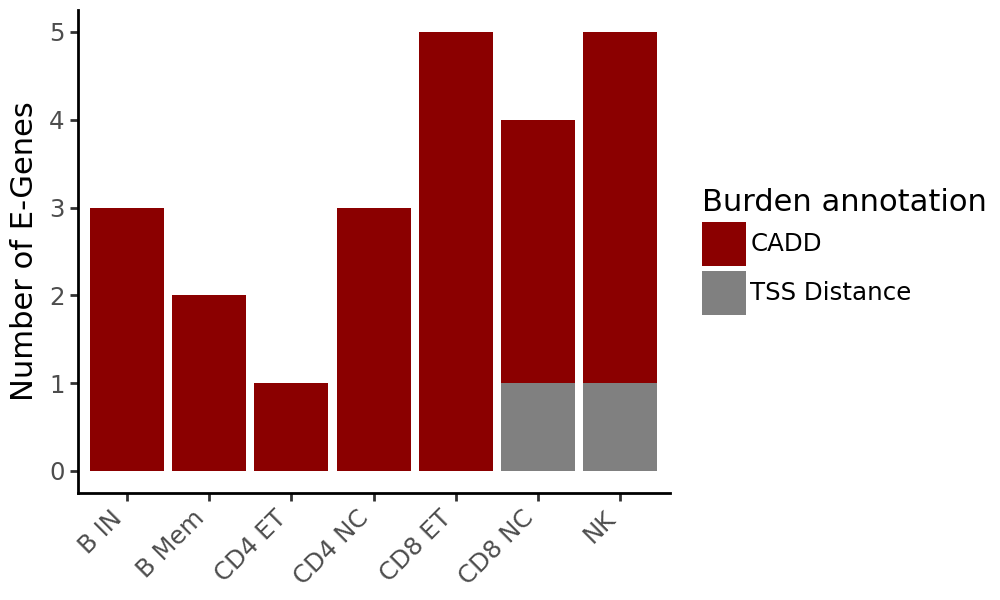

In [71]:
plot = (
    ggplot(e_genes_per_cell_type.query("cell_type not in @zero_types"), 
           aes(x='cell_type', y='count'))  # Specify the x and y variables
    + geom_bar(aes(fill = "burden_type"), stat = "identity")  # Add the boxplot layer
    + theme_classic()  # Optional: use a clean theme
    + theme(axis_text_x = element_text(angle = 45, hjust = 1, vjust = 1), figure_size = (5,3)) 
            #legend_position="none")
    + labs(y = "Number of E-Genes", x = "", fill = "Burden annotation")
    + scale_fill_manual(values = ['darkred', "grey"], labels = ["CADD",  "TSS Distance"])
)
plot

[2024-12-12 13:49:53,276] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


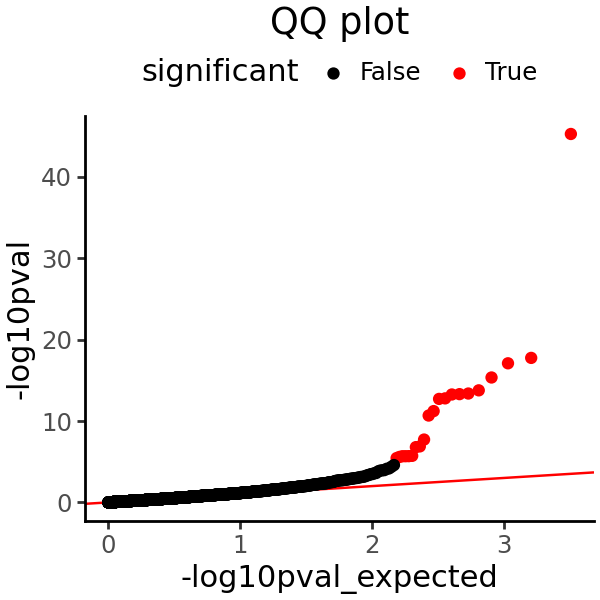

In [72]:
df = all_res.copy().query("burden_type == 'CADD_PHRED'")

df = df.sort_values("pvalue")
df["-log10pval_expected"] = -np.log10(np.arange(1, len(df) + 1) / len(df))

if "-log10pval" not in df.columns:
    df["-log10pval"] = -np.log10(df["pvalue"])

aes_kwargs = dict(x="-log10pval_expected", y="-log10pval")
plot = (
    ggplot(df, aes(**aes_kwargs, color="significant"))
    + labs(title="QQ plot")
    + scale_color_manual(values = ["black", "red"])
    + theme_classic()
    + geom_abline(intercept=0, slope=1, color="red")
    + geom_point()
    + theme(legend_position="top", figure_size = (3,3))
)
plot

In [73]:
data.adata.obs.groupby(cell_type_col).size().sort_values()

/scratch/tmp/l_back/ipykernel_1630959/914701118.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


cell_label
Erythrocytes       680
Plasma            3625
Platelets         4041
CD4 SOX4          4065
DC                8690
NK R              9677
Mono NC          15166
CD8 S100B        34528
Mono C           38233
B Mem            48023
CD4 ET           61786
B IN             82068
CD8 NC          133482
NK              159820
CD8 ET          205077
CD4 NC          463528
dtype: int64

In [74]:
sig_genes_cd4 = all_res.query("cell_type == 'CD4 NC' & significant")["burden_gene"].unique()
sig_genes_cd4
all_res.query("significant & burden_gene not in @sig_genes_cd4")

burden_gene      target_gene burden_type        pvalue      beta  \
1  ENSG00000249222  ENSG00000249222  CADD_PHRED  3.573664e-06  0.002566   
1  ENSG00000100376  ENSG00000100376  CADD_PHRED  4.169386e-14  0.022020   
1  ENSG00000075234  ENSG00000075234  CADD_PHRED  2.114804e-06  0.010769   
1  ENSG00000100219  ENSG00000100219  CADD_PHRED  1.899839e-06  0.015164   
0  ENSG00000230149  ENSG00000230149    DISTANCE  1.069421e-11  0.000420   
1  ENSG00000100376  ENSG00000100376  CADD_PHRED  5.468945e-14  0.013090   
0  ENSG00000075234  ENSG00000075234    DISTANCE  4.167390e-10  0.006513   
1  ENSG00000075234  ENSG00000075234  CADD_PHRED  2.116756e-11  0.007054   
1  ENSG00000100376  ENSG00000100376  CADD_PHRED  1.695342e-14  0.023579   
1  ENSG00000100376  ENSG00000100376  CADD_PHRED  4.965007e-14  0.033736   

  cell_type chrom  pvalue_corrected  significant  
1    CD8 ET    22      2.311446e-02         True  
1    CD8 ET    22      2.696759e-10         True  
1    CD8 ET    22      1.367855e-02         True  
1    CD8 NC    22      1.228816e-02         True  
0    CD8 NC    22      6.917015e-08         True  
1        NK    22      3.537314e-10         True  
0        NK    22      2.695468e-06         True  
1        NK    22      1.369118e-07         True  
1      B IN    22      1.096547e-10         True  
1     B Mem    22      3.211366e-10         True

In [78]:
gene_oi = "ENSG00000100376"

In [79]:
all_res.query("burden_gene == @gene_oi & burden_type == 'DISTANCE'")

burden_gene      target_gene burden_type    pvalue      beta cell_type  \
0  ENSG00000100376  ENSG00000100376    DISTANCE  0.508164  0.001894    CD8 ET   
0  ENSG00000100376  ENSG00000100376    DISTANCE  0.037463  0.000767    CD8 NC   
0  ENSG00000100376  ENSG00000100376    DISTANCE  0.650534  0.000047    CD4 NC   
0  ENSG00000100376  ENSG00000100376    DISTANCE  0.074270  0.003083        NK   
0  ENSG00000100376  ENSG00000100376    DISTANCE  0.766275  0.000914      B IN   
0  ENSG00000100376  ENSG00000100376    DISTANCE  0.149595  0.002617    CD4 ET   
0  ENSG00000100376  ENSG00000100376    DISTANCE  0.053745  0.008545     B Mem   

  chrom  pvalue_corrected  significant  
0    22       3286.805316        False  
0    22        242.311010        False  
0    22       4207.652929        False  
0    22        480.379843        False  
0    22       4956.266068        False  
0    22        967.583559        False  
0    22        347.624608        False

In [80]:
all_res.query("significant").groupby("burden_gene").size().to_frame(name = "Number of Sig. cell types").loc[gene_oi]

Number of Sig. cell types    4
Name: ENSG00000100376, dtype: int64

In [94]:
# this_ddata_mono = compute_pseudobulks(ddata, "Plasma")
# this_ddata_cd = compute_pseudobulks(ddata, "CD4 NC")

NameError: name 'compute_pseudobulks' is not defined

In [81]:
y_cd = this_ddata_cd.gdata.obsm["pseudo_mean"][gene_oi] 
y_mono = this_ddata_mono.gdata.obsm["pseudo_mean"][gene_oi]
b = this_ddata_mono.gdata.uns['gene_burdens'].query("Gene == @gene_oi")["CADD_PHRED"]

NameError: name 'this_ddata_cd' is not defined

In [51]:
merged = y_cd.to_frame(name = "CD4 NC").join(y_mono.to_frame(name = "Plasma")).join(b)
merged = merged.reset_index()\
    .melt(id_vars = ["CADD_PHRED", "id"], value_vars = ["CD4 NC","Plasma"], var_name = "Cell type", value_name = "Expression")
merged

CADD_PHRED         id Cell type  Expression
0          9.514        1_1    CD4 NC    0.000924
1          0.000        2_2    CD4 NC    0.000000
2          0.000        3_3    CD4 NC    0.002641
3          0.000        4_4    CD4 NC    0.001961
4          0.000        6_6    CD4 NC    0.000885
...          ...        ...       ...         ...
1957       0.000  1077_1078    Plasma    0.000000
1958       0.000  1078_1079    Plasma    0.000000
1959       0.000  1079_1080    Plasma    0.000000
1960       3.481  1080_1081    Plasma    0.000000
1961       0.000  1081_1082    Plasma    0.000000

[1962 rows x 4 columns]

/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 72 rows containing missing values.


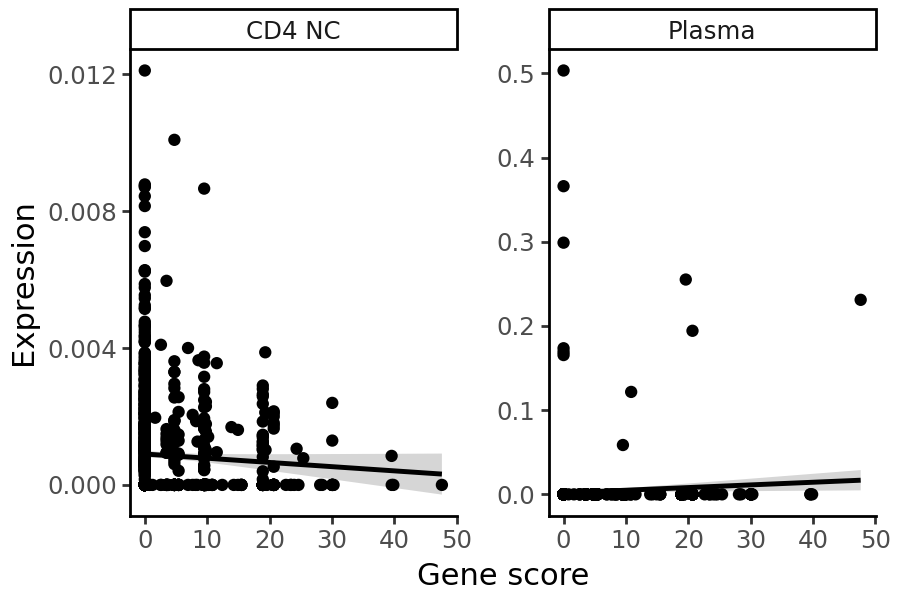

In [58]:
plot = (
    ggplot(merged, aes(x = "CADD_PHRED", y = "Expression"))
    + labs(x = "Gene score")
    + theme_classic()
    + geom_smooth()
    + geom_point()
    + facet_wrap("Cell type", scales = "free")
    + theme(legend_position="top", figure_size = (4.5,3))
)
plot